# Lab 1: The Cavendish Experiment  

The Cavendish experiment was carried out with the Pasco Gravitational Torsion Balance. This apparatus is capable of negating the effects of Earth's gravity in order to measure the gravitational forces acting on the smaller weighted spheres $m_2$, suspended on a pendulum, by the larger spheres $m_1$. For the experiment, we utilized Mathematica and video recording equipment to obtain position data of the oscillating beam reflected by the pendulum's mirror. 

We carried out **Method II: Measurement by Equilibrium Positions** from the Cavendish Pasco Manual. Equation 1.9 from the manual gives the calculation for $G$ with only 2 unknowns. These unknowns are the differences in equilibrium positions $\Delta s$ & the period $T$. The following is Eq. 1.9 and all known values:

$$
G = \pi^2 \Delta s b^2 \frac{d^2+\frac{2}{5}r^2}{T^2m_1Ld}
$$

where:

$r=9.55mm$

$d=50mm$

$b=46.5mm$
    
$m_1 = 1.5kg$

$L1= 8.80216m$ {Small Measurements and Trig relations}

$L2=8.724m$  {Single Tape Mearument}

We will also use the equation for $G_o$ on page 12 of the manual that accounts for systematic error as follows:

$$
G_o = \frac{G}{1-b}
$$


For comparison, we found the accepted value is, $G = 6.67430e-11$ from https://pml.nist.gov/cuu/Constants/.



The following Wolfram Notebooks contain all initial work on the data: 
> 1. Cavendish__EvanB_Run1
> 2. Cavendish_EvanB_Run1_Pixel_to_mm 
> 3. Cavendish__EvanB_Run2
> 4. Cavendish_EvanB_Run2_Pixel_to_mm
> 5. Cavendish__EvanB_Run3
> 6. Cavendish_EvanB_Run3_Pixel_to_mm
> 7. Cavendish__EvanB_Run4
> 8. Cavendish_EvanB_Run4_Pixel_to_mm
### Below is the initial loading and processing of the data:




In [44]:
############
# Packages #
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
################
# Load in data #
###################
# - Set 1 Data
file_run1 = 'run1data.csv'
data_set_1 = np.loadtxt(file_run1, skiprows=0, delimiter=',')
# - Set 2 Data
file_run2 = 'run2data.csv'
data_set_2 = np.loadtxt(file_run2, skiprows=0, delimiter=',')
# - Set 3 Data
file_run3 = 'run3data.csv'
data_set_3 = np.loadtxt(file_run3, skiprows=0, delimiter=',')
# - Set 4 Data
file_run4 = 'run4data.csv'
data_set_4 = np.loadtxt(file_run4, skiprows=0, delimiter=',')
########################
# Get data frames size #
data_size_1 = np.shape(data_set_1)[0]
data_size_2 = np.shape(data_set_2)[0]
data_size_3 = np.shape(data_set_3)[0]
data_size_4 = np.shape(data_set_4)[0]
Output_data_size = f"""
{'-'*42}
| Frames in Data set 1: {data_size_1}
| Frames in Data set 2: {data_size_2}
| Frames in Data set 3: {data_size_3}
| Frames in Data set 4: {data_size_4}
{'-'*42}
"""
print(Output_data_size)


------------------------------------------
| Frames in Data set 1: 714
| Frames in Data set 2: 681
| Frames in Data set 3: 676
| Frames in Data set 4: 677
------------------------------------------



## Data Structure:

The following data sets are of the **x-values** for the distance in pixels extracted from our experimental run *.MOV* videos. This is the basic data taken from Mathematica without any conversions, and it is only the horizontal position data as we exclude any up and down movement the pendulum experienced. However, as the initial time scale Mathematica produced from the *.MOV* is in frames we can simply take the size of data and create a **time frame** using `np.linspace()` as the data will go from 1 to the number of frames the video and subsequent data set contain.

Next is the conversion of both the **x-values** from *pixels to meters* and the **time frame** from *frames to seconds*. The conversion for *pixels to meters* for each run was carried out in the **Cavendish_EvanB_Run_Pixel_to_mm** files, yet later we decided to utilize meters as the units would match the `Best_Fit` function. Because of this I used Python to calculate a *pixel to meter* conversion using the following pixel lengths are their reference object in the frame:

> Run 1: An 11-inch long sheet of paper was found to be 159 pixels in length

> Run 2: An 11-inch long sheet of paper was found to be 141 pixels in length

> Run 3:  A 280.6mm long iPad was found to be 179 pixels in length

> Run 2: An 11-inch long sheet of paper was found to be 161 pixels in length
  
  
For conversions, these are the following start and stop times of each run's *.MOV* and total time of each video in seconds:

\begin{align*}
    \Delta t_{run 1} \approx 1:35:34 - 38 seconds = 5696 \textit{ seconds}\\
    \Delta t_{run 2} \approx 1:30:49 - 17 seconds = 5432 \textit{ seconds}\\
    \Delta t_{run 3} \approx 1:30:59 - 51 seconds = 5408 \textit{ seconds}\\
    \Delta t_{run 4} \approx 1:30:24 - 24 seconds = 5400 \textit{ seconds}\\
\end{align*}

These are then divided by the `data_size_(1,2,3,4)` to yield a *seconds to frames* conversion. This is confirmed in the print-out showing that the last index of `time` is in fact the ending time of the *.MOV* for each experimental run.  

After the conversions, each data set is made up of 2 individual arrays labeled `time(1,2,3,4)` and `distance_run_(1,2,3,4)` where the number denotes the experimental run that it belongs to. These are then utilized for calculation and plotting below.

In [68]:
############################################
# Create time array for each frame of data ###########################
time_frame_1 = np.linspace(start=1,stop=data_size_1,num=data_size_1) #
time_frame_2 = np.linspace(start=1,stop=data_size_2,num=data_size_2) #
time_frame_3 = np.linspace(start=1,stop=data_size_3,num=data_size_3) #
time_frame_4 = np.linspace(start=1,stop=data_size_4,num=data_size_4) #
######################################################################
## Conversions ##
###################################################
##############
# Data Set 1 #
# Time from frames to seconds                    
# - 5696sec/714frames                                                   
time1 = time_frame_1*(5696/data_size_1)                                         
##                                              
# Distance from pixels to m                    
# - (11in*.0254m/in)/159pixel                                                             
distance_run_1 = data_set_1*((11*.0254)/159)  
##################
##############681
# Data Set 2 #
# Time from frames to seconds                    
# - 5432sec/681frames                                                 
time2 = time_frame_2*(5432/data_size_2)                                         
##                                              
# Distance from pixels to m                     
# - (11in*.0254m/in)/141pixel                                                             
distance_run_2 = data_set_2*((11*.0254)/141)   
##################
##############
# Data Set 3 #
# Time from frames to seconds                    
# - 5408sec/676frames                                                    
time3 = time_frame_3*(5408/data_size_3)
# - 280.6mm/179pixels or .2806/179 m/pixel
distance_run_3 = data_set_3*(.2806/176)
###################
##############
# Data Set 4 #
# Time from frames to seconds                    
# - 5400sec/677frames                                             
time4 = time_frame_4*(5400/data_size_4)                                          
##                                              
# Distance from pixels to m                     
# - (11in*.0254m/in)/161pixel                                                             
distance_run_4 = data_set_4*((11*.0254)/161)    
##################
Output_Time_frame_check = f"""
{'-'*42}
| Video length Data set 1: {time1[data_size_1-1]} seconds
| Video length Data set 2: {time2[data_size_2-1]} seconds
| Video length Data set 3: {time3[data_size_3-1]} seconds
| Video length Data set 4: {time4[data_size_4-1]} seconds
{'-'*42}
"""
print(Output_Time_frame_check)


------------------------------------------
| Video length Data set 1: 5696.0 seconds
| Video length Data set 2: 5432.0 seconds
| Video length Data set 3: 5408.0 seconds
| Video length Data set 4: 5400.0 seconds
------------------------------------------



### Initial plotting of data to confirm data shape:

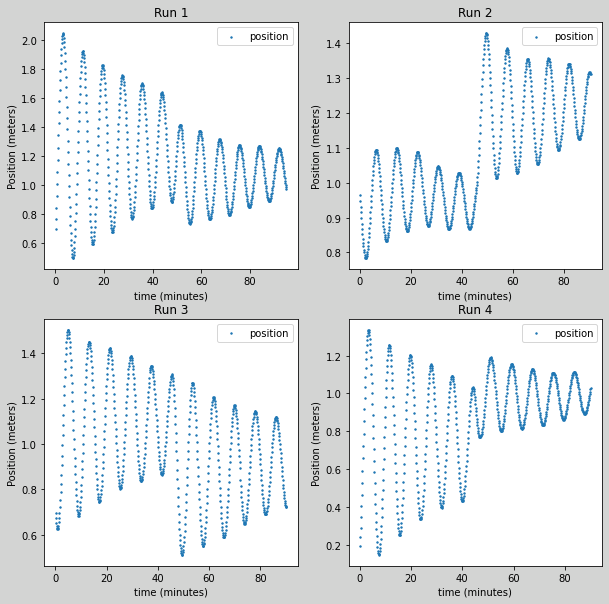

In [67]:
##################
## Initial Plot ##
################################################################
# Set subplot                                                  #
figure1, axis = plt.subplots( 2, 2,  figsize=(10, 10),         #
                       facecolor="#d3d4d3")                    # 
# Window Title                                                 #
figure1.canvas.manager.set_window_title(                       #
    'Cavendish Experioment Runs')                              #
# Run 1 Data   ##################################################                                      
axis[0,0].scatter(time1/60,distance_run_1,s=2,label="position") #
axis[0,0].set_title("Run 1")                                    #
axis[0,0].set_xlabel('time (minutes)')                          #
axis[0,0].set_ylabel('Position (meters)')                       #
axis[0,0].legend(loc='best')                                    #
# Run 2 Data   ##################################################                                      
axis[0,1].scatter(time2/60,distance_run_2,s=2,label="position") #
axis[0,1].set_title("Run 2")                                    #
axis[0,1].set_xlabel('time (minutes)')                          #
axis[0,1].set_ylabel('Position (meters)')                       #
axis[0,1].legend(loc='best')                                    #
# Run 3 Data   ################################################## 
axis[1,0].scatter(time3/60,distance_run_3,s=2,label="position") #
axis[1,0].set_title("Run 3")                                    #
axis[1,0].set_xlabel('time (minutes)')                          #
axis[1,0].set_ylabel('Position (meters)')                       #
axis[1,0].legend(loc='best')                                    #
# Run 4 Data (when we get it) ###################################
axis[1,1].scatter(time4/60,distance_run_4 ,s=2,label="position")#
axis[1,1].set_title("Run 4")                                    #
axis[1,1].set_xlabel('time (minutes)')                          #
axis[1,1].set_ylabel('Position (meters)')                       #
axis[1,1].legend(loc='best')                                    #

# Exclusion of Error bars

The error bars could be utilized if we had an experiment where we were able to gather data in such a way that we could analyze the standard deviation and the mean for the laser position. However, as can be seen above this experiment can produce widely different oscillation patterns while still producing accurate results such as **Run 1** & **Run 3**. Because of this, it is not possible to produce error bars on the position of the laser for our graphs. Furthermore, the bars themselves would make the graph hard to read as can be seen below in attempting to add error bars for the mean of position, with respect to **Run 1** data, into the plots. In order to even attempt this all data sets were forced to end at the smallest data set's limit of 676 *frames* by using `[:676]` to set the limit on all data. 

Below is the attempt to show how the uncertainty of the position could not be shown using the error bars: 

<ErrorbarContainer object of 3 artists>

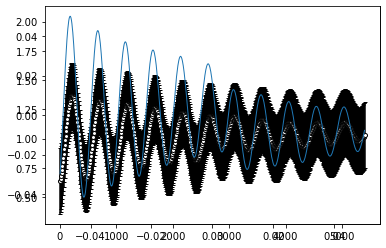

In [97]:
####################################
# Error bar for position attempt  #
figure_2 = plt.plot()
axis_2   = plt.axes()
axis_2 .plot(time1[:676],distance_run_1[:676],marker='', linestyle='-',linewidth=1,alpha=1, label='fit', zorder=2)
# setup an array of position data (all forced to have same length)
mean_data_array = np.array([distance_run_1[:676],distance_run_2[:676],distance_run_3[:676],distance_run_4[:676]])
# Take the mean of the array of position data
mean = np.mean(mean_data_array, 
               axis=0)
# Take the standard deviation of the array of position data
std_position    = np.std(mean_data_array)
# Setup Error Bars as in "China_nuclear_fallout.ipynb" referance
axis_2.errorbar(time1[:676],mean,
            color='k',
            marker='o',markersize=4, markerfacecolor='white',markeredgecolor='black',markeredgewidth=1.0,
            linestyle='', yerr=std_position, capsize=2, label='data', zorder=1)

# Fitting function in order to extract period: 

Here our function is defined as dampend oscillation as follows:

$$
x(t) = A e^{-k t} \sin{(\omega t + \phi)} + S_i
$$

where we are most concerned with the angular frequency $\omega$ as it defines our period needed for calculating $G$ as follows:

$$
\omega = \frac{2\pi}{T} \longrightarrow  T = \frac{2\pi}{\omega}
$$

We also need to find the equilibrium positions defined with $S_i$ for positions $i=1,2$. These parameters are given by the `popt` array returned by the `curve_fit` fucntion, and then used for calculation of $G$ below. As `curve_fit` uses intitial guesses we had to aproximate the values for each parameter, yet the funciton `curve_fit` does most of the work in finding the exact parameters, That being said our data sets for the second experimental run proved to be not-ideal and can be seen in the poor fit shown in the graph.

In [16]:
################
# Fit Function #####
def Best_Fit(t, A, k, omega, phi, s):
    return A*np.exp(-k*t)*np.sin(omega*t+phi)+s

## First Experimental Run

It should be noted that the change of equilibrium position occured at frame **379** for the first run's video. Yet all other runs were foudn to be at frame **345** which we found correspoinded to changing position at roughly **46:00** within the video. 

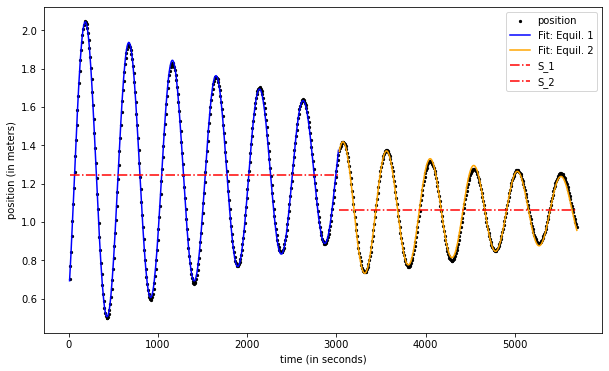


------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = 8.42403e-01 +/- 1.704e-03
|   k_1 = 2.96983e-04 +/- 1.485e-06
|  om_1 = 1.28653e-02 +/- 1.379e-06
| phi_1 = -8.22145e-01 +/- 1.855e-03
|   S_1 = 1.24684e+00 +/- 4.698e-04
------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = 8.67764e-01 +/- 1.746e-02
|   k_2 = 2.90621e-04 +/- 4.956e-06
|  om_2 = 1.28523e-02 +/- 5.062e-06
| phi_2 = -2.51091e-01 +/- 2.093e-02
|   S_2 = 1.06248e+00 +/- 6.624e-04
------------------------------------------



In [61]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 1
plt.scatter(
    time1, distance_run_1,
    s=5,
    color='black',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.2
guess_run1 = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run1_1, pcov_run1_1 = curve_fit(Best_Fit, time1[:379], distance_run_1[:379], p0=guess_run1)
###########################
# Plot best fit with data 
plt.plot(
    time1[:379], Best_Fit(time1[:379], *popt_run1_1),
    color='blue',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
#################
# Initial Guess 
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = 1.0
guess_run1_2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run1_2, pcov_run1_2 = curve_fit(Best_Fit, time1[379:], distance_run_1[379:], p0=guess_run1_2)
###########################
# Plot best fit with data 
plt.plot(
    time1[379:], Best_Fit(time1[379:], *popt_run1_2),
    color='Orange',
    label='Fit: Equil. 2'
)

##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time1[:379], 
    popt_run1_1[4] * np.ones_like(time1[:379]),
    linestyle='dashdot',
    color='red',
    label='S_1'
)

plt.plot(
    time1[379:], 
    popt_run1_2[4] * np.ones_like(time1[379:]),
    linestyle='dashdot',
    color='red',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show() ##################
############
##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run1_equ1 = np.sqrt(np.diag(pcov_run1_1))  
perr_run1_equ2 = np.sqrt(np.diag(pcov_run1_2))  
##########################
# Standard Error Output
output_standard_err_run1 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run1_1[0]:.5e} +/- {perr_run1_equ1[0]:.3e}
|   k_1 = {popt_run1_1[1]:.5e} +/- {perr_run1_equ1[1]:.3e}
|  om_1 = {popt_run1_1[2]:.5e} +/- {perr_run1_equ1[2]:.3e}
| phi_1 = {popt_run1_1[3]:.5e} +/- {perr_run1_equ1[3]:.3e}
|   S_1 = {popt_run1_1[4]:.5e} +/- {perr_run1_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run1_2[0]:.5e} +/- {perr_run1_equ2[0]:.3e}
|   k_2 = {popt_run1_2[1]:.5e} +/- {perr_run1_equ2[1]:.3e}
|  om_2 = {popt_run1_2[2]:.5e} +/- {perr_run1_equ2[2]:.3e}
| phi_2 = {popt_run1_2[3]:.5e} +/- {perr_run1_equ2[3]:.3e}
|   S_2 = {popt_run1_2[4]:.5e} +/- {perr_run1_equ2[4]:.3e}
{'-'*42}
"""
print(output_standard_err_run1)

## Second Experimental Run

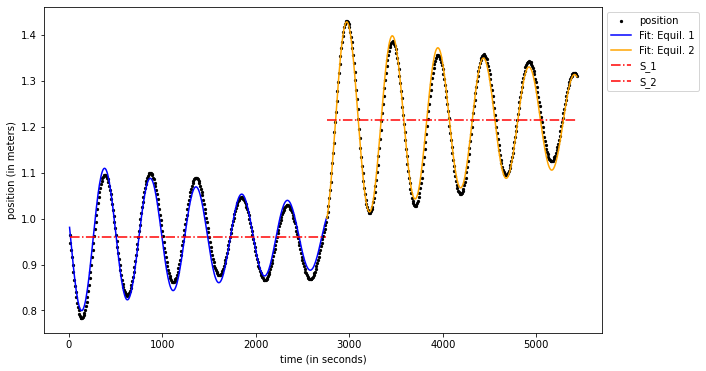


------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = -1.68430e-01 +/- 2.698e-03
|   k_1 = 3.23700e-04 +/- 1.299e-05
|  om_1 = 1.28540e-02 +/- 1.234e-05
| phi_1 = -2.23251e-01 +/- 1.531e-02
|   S_1 = 9.60587e-01 +/- 7.588e-04
------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = -5.45453e-01 +/- 1.631e-02
|   k_2 = 3.13505e-04 +/- 7.804e-06
|  om_2 = 1.28993e-02 +/- 7.734e-06
| phi_2 = -2.22989e+00 +/- 2.929e-02
|   S_2 = 1.21329e+00 +/- 6.366e-04
------------------------------------------



In [62]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 2
plt.scatter(
    time2, distance_run_2,
    s=5,
    color='black',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess_run2 = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run2_1, pcov_run2_1 = curve_fit(Best_Fit, time2[:345], distance_run_2[:345], p0=guess_run2)
###########################
# Plot best fit with data 
plt.plot(
    time2[:345], Best_Fit(time2[:345], *popt_run2_1),
    color='blue',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
# Initial Guess
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = 1.05
guess_run2_2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run2_2, pcov_run2_2 = curve_fit(Best_Fit, time2[345:], distance_run_2[345:], p0=guess_run2_2)
###########################
# Plot best fit with data 
plt.plot(
    time2[345:], Best_Fit(time2[345:], *popt_run2_2),
    color='orange',
    label='Fit: Equil. 2'
)
##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time2[:345], 
    popt_run2_1[4] * np.ones_like(time2[:345]),
    linestyle='dashdot',
    color='red',
    label='S_1'
)
plt.plot(
    time2[345:], 
    popt_run2_2[4] * np.ones_like(time2[345:]),
    linestyle='dashdot',
    color='red',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show() ##################
############
##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run2_equ1 = np.sqrt(np.diag(pcov_run2_1))  
perr_run2_equ2 = np.sqrt(np.diag(pcov_run2_2))  
##########################
# Standard Error Output
output_standard_err_run2 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run2_1[0]:.5e} +/- {perr_run2_equ1[0]:.3e}
|   k_1 = {popt_run2_1[1]:.5e} +/- {perr_run2_equ1[1]:.3e}
|  om_1 = {popt_run2_1[2]:.5e} +/- {perr_run2_equ1[2]:.3e}
| phi_1 = {popt_run2_1[3]:.5e} +/- {perr_run2_equ1[3]:.3e}
|   S_1 = {popt_run2_1[4]:.5e} +/- {perr_run2_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run2_2[0]:.5e} +/- {perr_run2_equ2[0]:.3e}
|   k_2 = {popt_run2_2[1]:.5e} +/- {perr_run2_equ2[1]:.3e}
|  om_2 = {popt_run2_2[2]:.5e} +/- {perr_run2_equ2[2]:.3e}
| phi_2 = {popt_run2_2[3]:.5e} +/- {perr_run2_equ2[3]:.3e}
|   S_2 = {popt_run2_2[4]:.5e} +/- {perr_run2_equ2[4]:.3e}
{'-'*42}
"""
print(output_standard_err_run2)

# Third Experimental Run

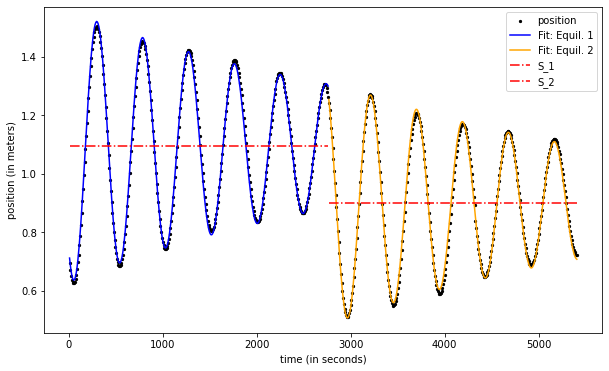

In [63]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 2
plt.scatter(
    time3, distance_run_3,
    s=5,
    color='black',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess_run3_1 = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run3_1, pcov_run3_1 = curve_fit(Best_Fit, time3[:345], distance_run_3[:345], p0=guess_run3_1)
###########################
# Plot best fit with data 
plt.plot(
    time3[:345], Best_Fit(time3[:345], *popt_run3_1),
    color='blue',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
# Initial Guess
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = .98
guess_run3_2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run3_2, pcov_run3_2 = curve_fit(Best_Fit, time3[345:], distance_run_3[345:], p0=guess_run3_2)
###########################
# Plot best fit with data 
plt.plot(
    time3[345:], Best_Fit(time3[345:], *popt_run3_2),
    color='orange',
    label='Fit: Equil. 2'
)
##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time3[:345], 
    popt_run3_1[4] * np.ones_like(time3[:345]),
    linestyle='dashdot',
    color='red',
    label='S_1'
)
plt.plot(
    time3[345:], 
    popt_run3_2[4] * np.ones_like(time3[345:]),
    linestyle='dashdot',
    color='red',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show() ##################
############
##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run3_equ1 = np.sqrt(np.diag(pcov_run3_1))  
perr_run3_equ2 = np.sqrt(np.diag(pcov_run3_2))  
##########################
# Standard Error Output
output_standard_err_run3 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run3_1[0]:.5e} +/- {perr_run3_equ1[0]:.3e}
|   k_1 = {popt_run3_1[1]:.5e} +/- {perr_run3_equ1[1]:.3e}
|  om_1 = {popt_run3_1[2]:.5e} +/- {perr_run3_equ1[2]:.3e}
| phi_1 = {popt_run3_1[3]:.5e} +/- {perr_run3_equ1[3]:.3e}
|   S_1 = {popt_run3_1[4]:.5e} +/- {perr_run3_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run3_2[0]:.5e} +/- {perr_run3_equ2[0]:.3e}
|   k_2 = {popt_run3_2[1]:.5e} +/- {perr_run3_equ2[1]:.3e}
|  om_2 = {popt_run3_2[2]:.5e} +/- {perr_run3_equ2[2]:.3e}
| phi_2 = {popt_run3_2[3]:.5e} +/- {perr_run3_equ2[3]:.3e}
|   S_2 = {popt_run3_2[4]:.5e} +/- {perr_run3_equ2[4]:.3e}
{'-'*42}
"""

# Fourth Experimental Run

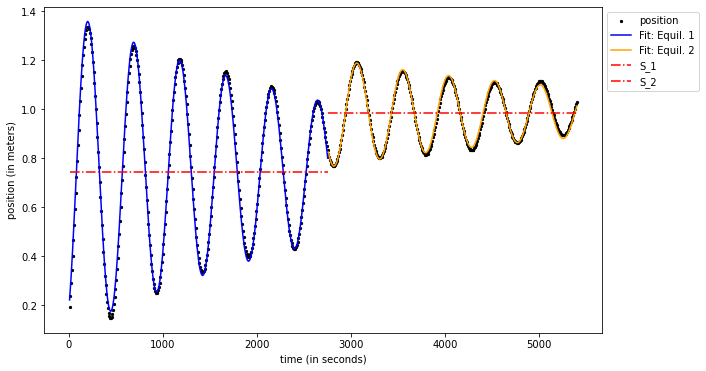


------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = 6.52143e-01 +/- 2.784e-03
|   k_1 = 3.03579e-04 +/- 3.343e-06
|  om_1 = 1.28629e-02 +/- 3.220e-06
| phi_1 = -1.03650e+00 +/- 3.986e-03
|   S_1 = 7.43939e-01 +/- 7.836e-04
------------------------------------------
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = 5.04822e-01 +/- 1.140e-02
|   k_2 = 2.97658e-04 +/- 5.970e-06
|  om_2 = 1.28843e-02 +/- 6.184e-06
| phi_2 = -1.89729e-01 +/- 2.381e-02
|   S_2 = 9.84881e-01 +/- 4.887e-04
------------------------------------------



In [64]:
plt.figure(figsize=(10, 6))
####################################
# Plot data set 4
plt.scatter(
    time4, distance_run_4,
    s=5,
    color='black',
    label='position'
)
##########################
# Equilibrium position 1 #
##########################
# Initial Guess
amplitude = 0.35
k = 0.0005
omega = 0.0125
phi = 0
s = 1.05
guess_run4_1 = np.array([amplitude, k, omega, phi, s])
#####################
# Call Fit Function
popt_run4_1, pcov_run4_1 = curve_fit(Best_Fit, time4[:345], distance_run_4[:345], p0=guess_run4_1)
###########################
# Plot best fit with data 
plt.plot(
    time4[:345], Best_Fit(time4[:345], *popt_run4_1),
    color='blue',
    label='Fit: Equil. 1'
)
##########################
# Equilibrium position 2 #
##########################
# Initial Guess
A2 = 0.3
k2 = 0.0001
om2 = 0.0125
phi2 = 0
s2 = .98
guess_run4_2 = np.array([A2, k2, om2, phi2, s2])
#####################
# Call Fit Function
popt_run4_2, pcov_run4_2 = curve_fit(Best_Fit, time4[345:], distance_run_4[345:], p0=guess_run4_2)
###########################
# Plot best fit with data 
plt.plot(
    time4[345:], Best_Fit(time4[345:], *popt_run4_2),
    color='orange',
    label='Fit: Equil. 2'
)
##############################
# Plot Equilibrium Positions #
##############################
plt.plot(
    time4[:345], 
    popt_run4_1[4] * np.ones_like(time4[:345]),
    linestyle='dashdot',
    color='red',
    label='S_1'
)
plt.plot(
    time4[345:], 
    popt_run4_2[4] * np.ones_like(time4[345:]),
    linestyle='dashdot',
    color='red',
    label='S_2'
)
#################
# Plot Settings #######################
plt.xlabel('time (in seconds)')
plt.ylabel('position (in meters)')
plt.legend(loc='best', bbox_to_anchor=(1.0, 1.0))
#############################
# Show plot and popt matrix #
plt.show() ##################
############
##################
# Standard Error #
##################
# -Taking the square root of the 
#  diagnol of the covariance matrix
#  to find the standard error
perr_run4_equ1 = np.sqrt(np.diag(pcov_run4_1))  
perr_run4_equ2 = np.sqrt(np.diag(pcov_run4_2))  
##########################
# Standard Error Output
output_standard_err_run4 =f"""
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the first
|    equilibrium position:
|
|   A_1 = {popt_run4_1[0]:.5e} +/- {perr_run4_equ1[0]:.3e}
|   k_1 = {popt_run4_1[1]:.5e} +/- {perr_run4_equ1[1]:.3e}
|  om_1 = {popt_run4_1[2]:.5e} +/- {perr_run4_equ1[2]:.3e}
| phi_1 = {popt_run4_1[3]:.5e} +/- {perr_run4_equ1[3]:.3e}
|   S_1 = {popt_run4_1[4]:.5e} +/- {perr_run4_equ1[4]:.3e}
{'-'*42}
| The following are the best fit parameters 
|   and their uncertainties for the second
|    equilibrium position:
|
|   A_2 = {popt_run4_2[0]:.5e} +/- {perr_run4_equ2[0]:.3e}
|   k_2 = {popt_run4_2[1]:.5e} +/- {perr_run4_equ2[1]:.3e}
|  om_2 = {popt_run4_2[2]:.5e} +/- {perr_run4_equ2[2]:.3e}
| phi_2 = {popt_run4_2[3]:.5e} +/- {perr_run4_equ2[3]:.3e}
|   S_2 = {popt_run4_2[4]:.5e} +/- {perr_run4_equ2[4]:.3e}
{'-'*42}
"""
print(output_standard_err_run4)

# G Calculation


In [65]:
##########################################
# Extract omega and calculate the period # 
##########################################
##############
# Data Set 1 #
###########################
# Eq. position 1
period_run1_1 = (2*np.pi)/popt_run1_1[2]
# Eq. position 2
period_run1_2 = (2*np.pi)/popt_run1_2[2]
# Delta-S
delta_s_run1 = abs(popt_run1_1[4] - popt_run1_2[4]) 
###########################
##############
# Data Set 2 #
###########################
# Eq. position 1
period_run2_1 = (2*np.pi)/popt_run2_1[2]
# Eq. position 2
period_run2_2 = (2*np.pi)/popt_run2_2[2]
# Delta-S
delta_s_run2 = abs(popt_run2_1[4] - popt_run2_2[4]) 
###########################
##############
# Data Set 3 #
###########################
# Eq. position 1
period_run3_1 = (2*np.pi)/popt_run3_1[2]
# Eq. position 2
period_run3_2 = (2*np.pi)/popt_run3_2[2]
# Delta-S
delta_s_run3 = abs(popt_run3_1[4] - popt_run3_2[4]) 
###########################
##############
# Data Set 4 #
###########################
# Eq. position 1
period_run4_1 = (2*np.pi)/popt_run4_1[2]
# Eq. position 2
period_run4_2 = (2*np.pi)/popt_run4_2[2]
# Delta-S
delta_s_run4 = abs(popt_run4_1[4] - popt_run4_2[4]) 
###########################
output_period_deltaS_calculations = f"""
{'-'*42}
| The period & delta-S calculations for the
|   first data set are as follows:
|
|   Eq. Pos. 1 (T1) = {period_run1_1:.5f}
|   Eq. Pos. 2 (T2) = {period_run1_2:.5f}
|   delta-S         = {delta_s_run1:.5f}
|
{'-'*42}
| The period & delta-S calculations for the
|   second data set are as follows:
|
|   Eq. Pos. 1 (T1) = {period_run2_1:.5f}
|   Eq. Pos. 2 (T2) = {period_run2_2:.5f}
|   delta-S         = {delta_s_run2:.5f}
|
{'-'*42}
| The period & delta-S calculations for the
|   third data set are as follows:
|
|   Eq. Pos. 1 (T1) = {period_run3_1:.5f}
|   Eq. Pos. 2 (T2) = {period_run3_2:.5f}
|   delta-S         = {delta_s_run3:.5f}
|
{'-'*42}
| The period & delta-S calculations for the
|   fourth data set are as follows:
|
|   Eq. Pos. 1 (T1) = {period_run4_1:.5f}
|   Eq. Pos. 2 (T2) = {period_run4_2:.5f}
|   delta-S         = {delta_s_run4:.5f}
|
{'-'*42}
"""
print(output_period_deltaS_calculations)


------------------------------------------
| The period & delta-S calculations for the
|   first data set are as follows:
|
|   Eq. Pos. 1 (T1) = 488.38173
|   Eq. Pos. 2 (T2) = 488.87595
|   delta-S         = 0.18436
|
------------------------------------------
| The period & delta-S calculations for the
|   second data set are as follows:
|
|   Eq. Pos. 1 (T1) = 488.81035
|   Eq. Pos. 2 (T2) = 487.09357
|   delta-S         = 0.25270
|
------------------------------------------
| The period & delta-S calculations for the
|   third data set are as follows:
|
|   Eq. Pos. 1 (T1) = 488.17912
|   Eq. Pos. 2 (T2) = 489.18348
|   delta-S         = 0.19192
|
------------------------------------------
| The period & delta-S calculations for the
|   fourth data set are as follows:
|
|   Eq. Pos. 1 (T1) = 488.47531
|   Eq. Pos. 2 (T2) = 487.66197
|   delta-S         = 0.24094
|
------------------------------------------



In [66]:
####################
# Define constants #
##################### 
# - Can be reused
##############
r  = 0.00955 # meter
d  = 0.05    # meter
b  = 0.0464  # meter
m1 = 1.5     # Kilogram
L = 8.80216 # meter
L2 = 8.724   # meter
##############
################
## G equation ##
###############################################################################################################
# Data Set 1                                                                                           
G_run1_period1 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_1**2)*m1*L*d)) 
G_run1_period2 = (np.pi**2)*(delta_s_run1)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run1_2**2)*m1*L*d))  
# Data Set 2                                                                                           
G_run2_period1 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_1**2)*m1*L*d)) 
G_run2_period2 = (np.pi**2)*(delta_s_run2)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run2_2**2)*m1*L*d))  
# Data Set 3                                                                                           
G_run3_period1 = (np.pi**2)*(delta_s_run3)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run3_1**2)*m1*L*d)) 
G_run3_period2 = (np.pi**2)*(delta_s_run3)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run3_2**2)*m1*L*d)) 
# Data Set 4                                                                                           
G_run4_period1 = (np.pi**2)*(delta_s_run4)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run4_1**2)*m1*L*d)) 
G_run4_period2 = (np.pi**2)*(delta_s_run4)*(b**2)*( (d**2 + (2/5)*(r**2))/((period_run4_2**2)*m1*L*d))  
############################################################################################################
####################
## G_o correction ##
################################################
# Data Set 1 
G_o_run1_period1 = G_run1_period1/(1-b) 
G_o_run1_period2 = G_run1_period2/(1-b) 
# Data Set 2 
G_o_run2_period1 = G_run2_period1/(1-b) 
G_o_run2_period2 = G_run2_period2/(1-b) 
# Data Set 3
G_o_run3_period1 = G_run3_period1/(1-b) 
G_o_run3_period2 = G_run3_period2/(1-b)  
# Data Set 4
G_o_run4_period1 = G_run4_period1/(1-b) 
G_o_run4_period2 = G_run4_period2/(1-b)  
################################################
#####################
# Ratio of accuracy #
#####################
# -https://pml.nist.gov/
accepted_G = 6.67430e-11
################################################
# Data Set 1 
percent_acc_run1_period1 = abs(100 - (G_o_run1_period1/accepted_G)*100)
percent_acc_run1_period2 = abs(100 - (G_o_run1_period2/accepted_G)*100)
# Data Set 2 
percent_acc_run2_period1 = abs(100 - (G_o_run2_period1/accepted_G)*100)
percent_acc_run2_period2 = abs(100 - (G_o_run2_period2/accepted_G)*100)
# Data Set 3 
percent_acc_run3_period1 = abs(100 - (G_o_run3_period1/accepted_G)*100)
percent_acc_run3_period2 = abs(100 - (G_o_run3_period2/accepted_G)*100)
# Data Set 4 
percent_acc_run4_period1 = abs(100 - (G_o_run4_period1/accepted_G)*100)
percent_acc_run4_period2 = abs(100 - (G_o_run4_period2/accepted_G)*100)
################################################
###############
# Uncertainty #
###############
# For the Large Masses
# +/- 10g on page 3 of manual
m1_per_uncert = (10/1500)*100
##
# For our L measurment
L_uncert= (0.0005/L)
L_per_uncer = (L_uncert/L)*100
############################
# Data Set 1
uncert_run1_1 = 2*((perr_run1_equ1[2]/period_run1_1)*100) +\
((perr_run1_equ1[4]+perr_run1_equ2[4])/delta_s_run1)*100  +\
L_per_uncer+m1_per_uncert
#
uncert_run1_2 = 2*((perr_run1_equ2[2]/period_run1_2)*100) +\
((perr_run1_equ1[4]+perr_run1_equ2[4])/delta_s_run1)*100  +\
L_per_uncer+m1_per_uncert
##############################
# Data Set 2
uncert_run2_1 = 2*((perr_run2_equ1[2]/period_run2_1)*100) +\
((perr_run2_equ1[4]+perr_run2_equ2[4])/delta_s_run2)*100  +\
L_per_uncer+m1_per_uncert
#
uncert_run2_2 = 2*((perr_run2_equ2[2]/period_run2_2)*100) +\
((perr_run2_equ1[4]+perr_run2_equ2[4])/delta_s_run2)*100  +\
L_per_uncer+m1_per_uncert
######################################
# Data Set 3
uncert_run3_1 = 2*((perr_run3_equ1[2]/period_run3_1)*100) +\
((perr_run3_equ1[4]+perr_run3_equ2[4])/delta_s_run3)*100  +\
L_per_uncer+m1_per_uncert
#
uncert_run3_2 = 2*((perr_run3_equ2[2]/period_run3_2)*100) +\
((perr_run3_equ1[4]+perr_run3_equ2[4])/delta_s_run3)*100  +\
L_per_uncer+m1_per_uncert
####################################
# Data Set 4
uncert_run4_1 = 2*((perr_run4_equ1[2]/period_run4_1)*100) +\
((perr_run4_equ1[4]+perr_run4_equ2[4])/delta_s_run4)*100  +\
L_per_uncer+m1_per_uncert
#
uncert_run4_2 = 2*((perr_run4_equ2[2]/period_run4_2)*100) +\
((perr_run4_equ1[4]+perr_run4_equ2[4])/delta_s_run4)*100  +\
L_per_uncer+m1_per_uncert
#####################################
####################################
## Standard Deviation of the Mean ##
##########################################
# Set G's to array
G_o_calcs = np.array([G_o_run1_period1,
                      G_o_run1_period2,
                      G_o_run2_period1,
                      G_o_run2_period2,
                      G_o_run3_period1,
                      G_o_run3_period2,
                      G_o_run4_period1,
                      G_o_run4_period2,])
# calculate
SDOM = np.std(G_o_calcs)/np.sqrt(len(G_o_calcs))
#######
Best_value = f"""
{'-'*42}
| The standard deviation of the 
|   mean was calculated for G_o:
|   SDOM =  {SDOM:.2e}  
|
{'-'*42}
"""
print(Best_value)
###############################
#######################
output_run_final = f"""
{'-'*42}
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G_o(T1) = {G_o_run1_period1:.5e} +/- {uncert_run1_1:.5f} m^3/kg*s 
|   G_o(T2) = {G_o_run1_period2:.5e} +/- {uncert_run1_2:.5f} m^3/kg*s 
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) {percent_acc_run1_period1:.4f}% 
|  (T1) {percent_acc_run1_period2:.4f}% 
|
{'-'*42}
{'-'*42}
| The gravitational constants calculated using 
|   data set 2 are as follows:
|
|   G_o(T1) = {G_o_run2_period1:.5e} +/- {uncert_run2_1:.5f} m^3/kg*s
|   G_o(T2) = {G_o_run2_period2:.5e} +/- {uncert_run2_2:.5f} m^3/kg*s
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) {percent_acc_run2_period1:.4f}% 
|  (T1) {percent_acc_run2_period2:.4f}% 
|
{'-'*42}
{'-'*42}
| The gravitational constants calculated using 
|   data set 3 are as follows:
|
|   G_o(T1) = {G_o_run3_period1:.5e} +/- {uncert_run3_1:.5f} m^3/kg*s
|   G_o(T2) = {G_o_run3_period2:.5e} +/- {uncert_run3_2:.5f} m^3/kg*s
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) {percent_acc_run3_period1:.4f}% 
|  (T1) {percent_acc_run3_period2:.4f}% 
|
{'-'*42}
{'-'*42}
| The gravitational constants calculated using 
|   data set 4 are as follows:
|
|   G_o(T1) = {G_o_run4_period1:.5e} +/- {uncert_run4_1:.5f} m^3/kg*s
|   G_o(T2) = {G_o_run4_period2:.5e} +/- {uncert_run4_2:.5f} m^3/kg*s
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) {percent_acc_run4_period1:.4f}% 
|  (T1) {percent_acc_run4_period2:.4f}% 
|
{'-'*42}
"""
print(output_run_final)


------------------------------------------
| The standard deviation of the 
|   mean was calculated for G_o:
|   SDOM =  3.81e-12  
|
------------------------------------------


------------------------------------------
| The gravitational constants calculated using 
|   data set 1 are as follows:
|
|   G_o(T1) = 6.61758e-11 +/- 1.28143 m^3/kg*s 
|   G_o(T2) = 6.60420e-11 +/- 1.28143 m^3/kg*s 
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) 0.8499% 
|  (T1) 1.0503% 
|
------------------------------------------
------------------------------------------
| The gravitational constants calculated using 
|   data set 2 are as follows:
|
|   G_o(T1) = 9.05479e-11 +/- 1.21952 m^3/kg*s
|   G_o(T2) = 9.11873e-11 +/- 1.21952 m^3/kg*s
|
| Compared to the accepted values these are
|  inaccurate by the following percentages:
|
|  (T1) 35.6666% 
|  (T1) 36.6246% 
|
------------------------------------------
--------------------------------------

# Conclusion 

For the four experimental runs, we carried out our closest value to the accepted $G$ value is, $G_o \approx 6.61758 \times 10^{-11} \pm 1.28143 \frac{m^3}{kg\cdot s}$, which was calculated from our first experimental run's first equilibrium position. However, this value also carries with it the second to greatest uncertainty behind data set 3's uncertainty of $0.8499 \%$. Thus, there is still some systematic error unaccounted for within the experiment. Especially when this is compared to the values from our second and fourth experimental run. We somehow found approximate values for the first and third runs, yet our second and fourth showed severe errors. This could have come from miscalculated lowering of the saddle which keeps the pendulum in place while not being used. 

## Uncertainty
The uncertainty for each $G_o$ calculation was taken from the square root of the diagonal of the covariance matrix. This means that the uncertainty for each of the fit parameters $T$, $S_1$, & $S_2$ were used within the equation for $G$. Given that $\Delta S$ is a summation then we can sum their uncertainties, but the calculation of the period is $\frac{2\pi}{\omega}$ and in $G$ the period is squared; thus we must finish our summation of uncertainties as the fractional uncertainties of $\Delta S$ & $T$. 

The uncertainty for the mass $m_1$ was found to be $\pm 10g$ as defined on page 3 of the Pasco manual, and it's percentage of uncertaitny was calculated as $\frac{10g}{1500g}\cdot100\%$. For our measurements of L we decided to use L1 which we defined as our smaller measurments of the apparatus along with trigonometric relations. We also defiend the uncertainty of this mesurement to be $\pm 0.0005$. These were also included in the calculation of the uncertainty percentage.   

With this taken into account we can see our measurement with the least uncertainty was from our fourth data set. This measurment of $G_o = 8.64524 \times 10^{-11} \pm 1.19537 \frac{m^3}{kg\cdot s}$ was roughly $29.5\%$ away from the accepted value for $G$, yet has the least uncertainty within it's mearuments. Overall, our results show that we did in fact get a measurement within $1\%$ of the accepted value. The uncertainty within the fit parameters shows that there is an error in processing the data to find the period and equilibrium positions. Also as the uncertainty was greater for the closest calculation of $G$ it can be concluded that this is not as accurate as it may appear.


## Difference in work

It should be noted that I performed little work in Mathematica, and chose to build a time frame of the given frames in Python and carry out the conversion within Python instead of Mathematica. While my partners carried out the conversation on the data within Mathematica before exporting it as a .csv for processing in Python. I also believe as we each eyeballed the image cropping to find the $\frac{mm}{pixel}$ conversion we may have slight differences by $1-2$ $pixels$. With this in mind, our values still coincide with one another, and rather show our individual work, and the possible error that can arise. Such as within our 3rd experimental run where we used the Ipad within the frame of video for our grid measurement. Given the use of a more precise scale and camera, I believe these disparities within our work would be remedied.   